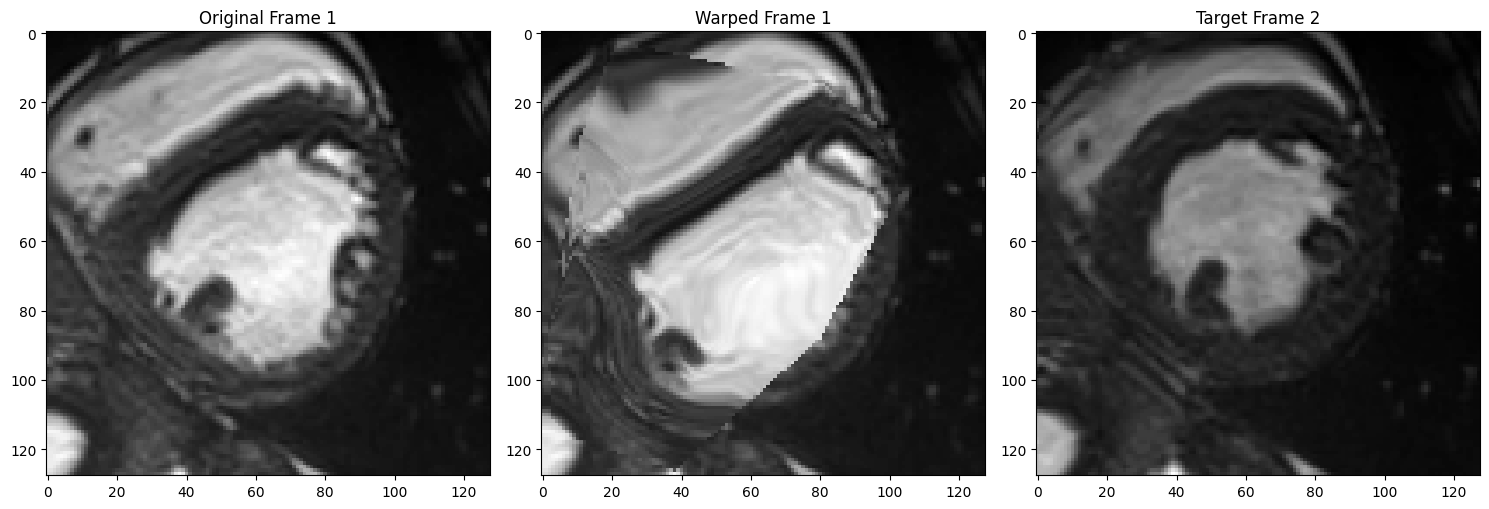

In [26]:
# Lucas Kenade Optical Flow 

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the frames from .npy files
frame1 = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/FrameWork/real_test_data/patient_4d_frame_1.npy").astype(np.uint8)
frame2 =np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/FrameWork/real_test_data/patient_4d_frame_13.npy").astype(np.uint8)

import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def apply_displacement( image, x_displacement, y_displacement):
    # Prepare meshgrid for remap
    height, width = image.shape
    x, y = np.meshgrid(np.arange(width), np.arange(height))

    # Apply displacement (scale the displacements for more visible effect)
    x_new = (x + x_displacement).astype(np.float32)
    y_new = (y + y_displacement).astype(np.float32)
    # convert image tensor to numpy
    # image = image.numpy()
    

    # Warp the image using remap for both x and y displacements
    displaced_image = cv2.remap(image, x_new, y_new, interpolation=cv2.INTER_LANCZOS4, borderMode=cv2.BORDER_REFLECT)
    return displaced_image

# Feature detection
feature_params = dict(maxCorners=500, qualityLevel=0.08, minDistance=5, blockSize=7)
p0 = cv2.goodFeaturesToTrack(frame1, mask=None, **feature_params)

# Lucas-Kanade optical flow
lk_params = dict(winSize=(15, 15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
p1, st, err = cv2.calcOpticalFlowPyrLK(frame1, frame2, p0, None, **lk_params)

# Get valid matches
good_old = p0[st == 1].reshape(-1, 2)
good_new = p1[st == 1].reshape(-1, 2)
displacement = good_new - good_old  # (dx, dy)

# Interpolate sparse displacements to dense field
h, w = frame1.shape
grid_x, grid_y = np.meshgrid(np.arange(w), np.arange(h))

# Interpolate dx and dy using griddata
dx_grid = griddata(good_old, displacement[:, 0], (grid_x, grid_y), method='cubic', fill_value=0)
dy_grid = griddata(good_old, displacement[:, 1], (grid_x, grid_y), method='cubic', fill_value=0)

# Compute the new pixel locations for remapping
map_x = (grid_x + dx_grid).astype(np.float32)
map_y = (grid_y + dy_grid).astype(np.float32)

# Warp frame1
warped_frame1 = apply_displacement(frame1, dx_grid, dy_grid)

# Show the result
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Frame 1")
plt.imshow(frame1, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Warped Frame 1")
plt.imshow(warped_frame1, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Target Frame 2")
plt.imshow(frame2, cmap='gray')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


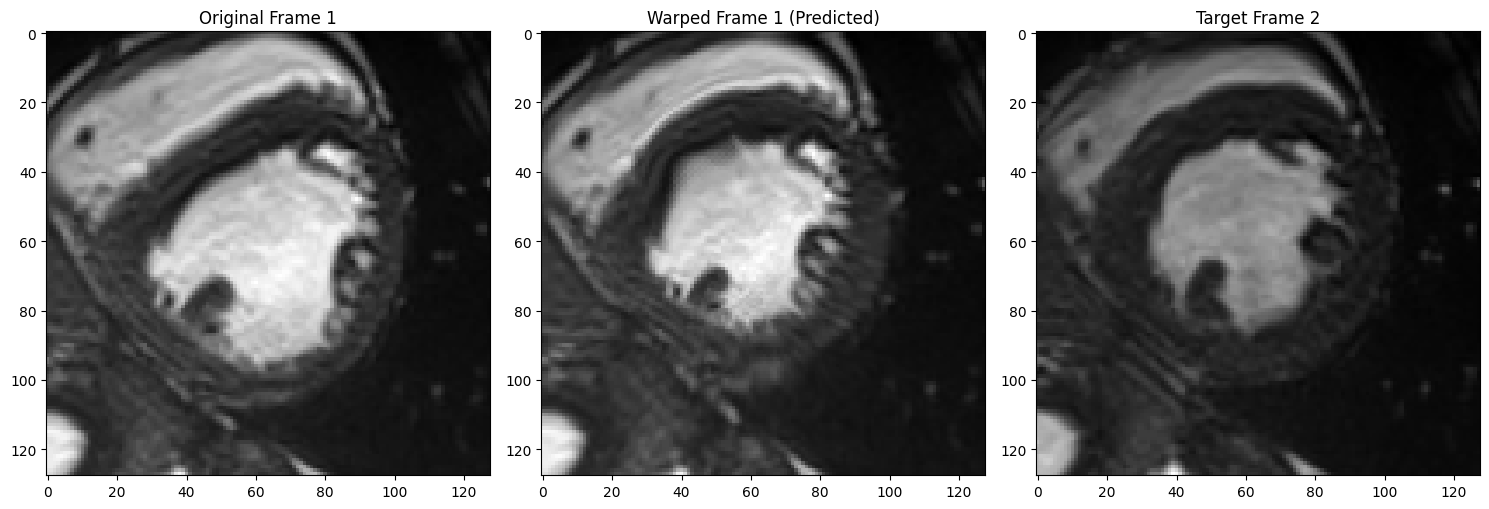

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
from keras.layers import Input, concatenate, add, Multiply, Lambda
from keras.models import Model
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.models import Model
from scipy.ndimage import gaussian_filter
from pathlib import Path
import os
import cv2
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable
sys.path.append(os.path.abspath("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/FrameWork/Models_Arch"))
sys.path.append(os.path.abspath("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/FrameWork"))
from mask_loss import MaskLoss
from mask_loss import MAELoss
# print(str(Path(__file__).parent))
from ResidualUnet import Residual_Unet
from Unet import Unet
from Unet_7Kernel import Unet_7Kernel
from Unet_5Kernel import Unet_5Kernel
from Unet_3Dense import Unet_3Dense
from Unet_1Dense import Unet_1Dense
from Unet_2Dense import Unet_2Dense
from Unet_1Dense_7Kernel import Unet_1Dense_7Kernel
from Unet_1Dense_5Kernel import Unet_1Dense_5Kernel
from Unet_2Dense_7Kernel import Unet_2Dense_7Kernel
from Unet_2Dense_5Kernel import Unet_2Dense_5Kernel
from Unet_3Dense_7Kernel import Unet_3Dense_7Kernel
from Unet_3Dense_5Kernel import Unet_3Dense_5Kernel
from ResidualUnet_1Dense import Residual_Unet_1D
from ResidualUnet_2Dense import Residual_Unet_2D
from ResidualUnet_3Dense import Residual_Unet_3D
from ResidualUnet_1Dense_7Kernels import Residual_Unet_1D_7K
from ResidualUnet_1Dense_5Kernels import Residual_Unet_1D_5K
from ResidualUnet_2Dense_7Kernels import Residual_Unet_2D_7K
from ResidualUner_2Dense_5Kernels import Residual_Unet_2D_5K
from ResidualUnet_3Dense_7Kernels import Residual_Unet_3D_7K
from ResidualUnet_3Dense_5Kernels import Residual_Unet_3D_5K

def apply_displacement( image, x_displacement, y_displacement):
    # Prepare meshgrid for remap
    height, width = image.shape
    x, y = np.meshgrid(np.arange(width), np.arange(height))

    # Apply displacement (scale the displacements for more visible effect)
    x_new = (x + x_displacement).astype(np.float32)
    y_new = (y + y_displacement).astype(np.float32)
    # convert image tensor to numpy
    # image = image.numpy()
    

    # Warp the image using remap for both x and y displacements
    displaced_image = cv2.remap(image, x_new, y_new, interpolation=cv2.INTER_LANCZOS4, borderMode=cv2.BORDER_REFLECT)
    return displaced_image
model = tf.keras.models.load_model("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Best_models/Unet_3Dense_5Kernel_with_mask (1).keras", custom_objects={'MaskLoss': MaskLoss, 'MAELoss': MAELoss, 'Unet_2Dense_5Kernel': Unet_2Dense_5Kernel, 'Residual_Unet': Residual_Unet, 'Unet': Unet, 'Unet_7Kernel': Unet_7Kernel, 'Unet_5Kernel': Unet_5Kernel, 'Unet_3Dense': Unet_3Dense, 'Unet_1Dense': Unet_1Dense, 'Unet_2Dense': Unet_2Dense, 'Unet_1Dense_7Kernel': Unet_1Dense_7Kernel, 'Unet_1Dense_5Kernel': Unet_1Dense_5Kernel, 'Unet_2Dense_7Kernel': Unet_2Dense_7Kernel, 'Unet_2Dense_5Kernel': Unet_2Dense_5Kernel, 'Unet_3Dense_7Kernel': Unet_3Dense_7Kernel, 'Unet_3Dense_5Kernel': Unet_3Dense_5Kernel, 'Residual_Unet_1D': Residual_Unet_1D, 'Residual_Unet_2D': Residual_Unet_2D, 'Residual_Unet_3D': Residual_Unet_3D, 'Residual_Unet_1D_7K': Residual_Unet_1D_7K, 'Residual_Unet_1D_5K': Residual_Unet_1D_5K, 'Residual_Unet_2D_7K': Residual_Unet_2D_7K, 'Residual_Uner_2D_5K': Residual_Unet_2D_5K, 'Residual_Unet_3D_7K': Residual_Unet_3D_7K, 'Residual_Unet_3D_5K': Residual_Unet_3D  })
frame1 = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/FrameWork/real_test_data/patient_4d_frame_1.npy"
frame2 = "/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/FrameWork/real_test_data/patient_4d_frame_13.npy"
# predict
frame1 = np.load(frame1).astype(np.float32)
frame2 = np.load(frame2).astype(np.float32)
real_moving_image_expanded = tf.expand_dims(frame1, axis=0)
real_fixed_image_expanded = tf.expand_dims(frame2, axis=0)
predicted_deformation_field = model.predict([real_moving_image_expanded, real_fixed_image_expanded])
    
x_disp_map_pred = predicted_deformation_field[0, :, :, 0]
y_disp_map_pred = predicted_deformation_field[0, :, :, 1]
# warp the first frame using the predicted displacement field
warped_frame1_pred = apply_displacement(frame1, x_disp_map_pred, y_disp_map_pred)
# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Frame 1")
plt.imshow(frame1, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Warped Frame 1 (Predicted)")
plt.imshow(warped_frame1_pred, cmap='gray')
plt.subplot(1, 3, 3)        
plt.title("Target Frame 2")
plt.imshow(frame2, cmap='gray')
plt.tight_layout()
plt.show()